In [78]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 14})

In [112]:
## import data
path='tests_new/'
data=np.loadtxt(path+'potential.txt',skiprows=1)

In [113]:
## set up variables
xr=(data[:,0]) #A
yr=(data[:,1]) #A
zr=(data[:,2]) #A
radius=np.sqrt(xr**2+yr**2+zr**2)
dists=data[:,3]
energy=data[:,4]


## average in a certain ragion
dists_avg=[]
energy_avg=[]
step=0.02
x=np.arange(int(np.min(radius)),int(np.max(radius)+0.5),step)

for i in x:
    if len(dists[(radius>=i)*(radius<(i+step))])>0:
        dists_avg.append(np.median(dists[(radius>=i)*(radius<(i+step))]))
        energy_avg.append(np.median(energy[(radius>=i)*(radius<(i+step))]))
    else:
        dists_avg.append(np.nan)
        energy_avg.append(np.nan)

energy_avg=np.array(energy_avg)
dists_avg=np.array(dists_avg)

## set up fits
(xlimen,xlimdist)=(0.2,0.2)
enpars=np.polyfit(x[np.abs(x)<=xlimen],energy_avg[np.abs(x)<=xlimen],2)
distpars=np.polyfit(x[np.abs(x)<=xlimdist],dists_avg[np.abs(x)<=xlimdist],2)
p_en = np.poly1d(enpars)
p_dist = np.poly1d(distpars)



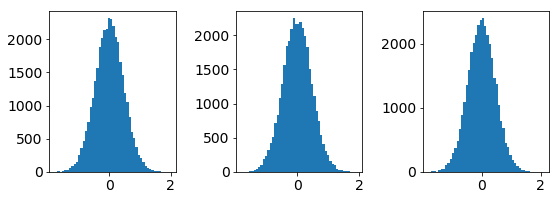

In [114]:
## plot distribution of shifts
f,ax=plt.subplots(1,3,figsize=(8,3))
n=50
ax[0].hist(xr,n)
ax[1].hist(yr,n)
ax[2].hist(zr,n)
plt.tight_layout()
plt.show()

/home/christoph/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/christoph/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


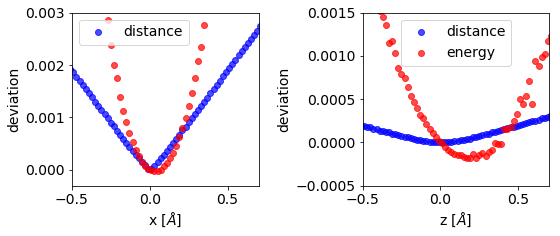

In [115]:
## plot 1d potentials (x,y,z)
datax=np.loadtxt('tests_new/potential1dx.txt',skiprows=1)
datay=np.loadtxt('tests_new/potential1dy.txt',skiprows=1)
dataz=np.loadtxt('tests_new/potential1dz.txt',skiprows=1)


## averaging
datax_avg=[]
dataz_avg=[]
step=0.02
x=np.arange(int(np.min(datax)),int(np.max(datax)+0.5),step)

for i in x:
    if len(datax[(datax[:,0]>=i)*(datax[:,0]<(i+step))])>0:
        datax_avg.append([i+step/2,np.median(datax[(datax[:,0]>=i)*(datax[:,0]<(i+step))][:,1]),
                            np.median(datax[(datax[:,0]>=i)*(datax[:,0]<(i+step))][:,2])])
        dataz_avg.append([i+step/2,np.median(dataz[(dataz[:,0]>=i)*(dataz[:,0]<(i+step))][:,1]),
                            np.median(dataz[(dataz[:,0]>=i)*(dataz[:,0]<(i+step))][:,2])])


        
#parameters for plot
lims=[(-0.0003,0.003),(-0.0005,0.0015)]

datas=[datax,dataz]
datas=[np.array(datax_avg),np.array(dataz_avg)]
f,ax=plt.subplots(1,len(datas),figsize=(8,3.5))
colors=['blue','red']
label=['distance','energy']
axlabel=['x [$\AA$]','z [$\AA$]']
for j in range(2):    
    for i in range(len(datas)):
        ax[i].scatter(datas[i][:,0],datas[i][:,j+1],c=colors[j],alpha=0.7,label=label[j])
    ax[j].set_xlim(-0.5,0.7)
    ax[j].set_ylim(lims[j][0],lims[j][1])
    ax[j].legend()
    ax[j].set_xlabel(axlabel[j])
    ax[j].set_ylabel('deviation')
plt.tight_layout()
plt.savefig(path+'1dpotentials.svg')
plt.show()

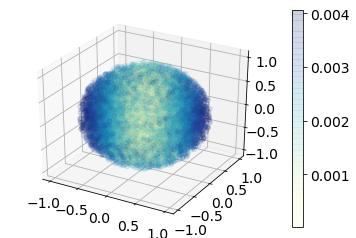

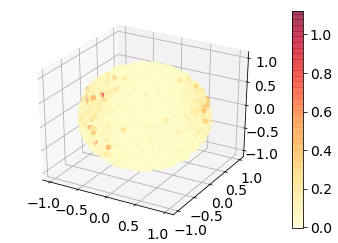

In [116]:
## 3D plot of rawdata
(xlimen,xlimdist)=(1,1)

fig = plt.figure()
colormap='YlGnBu'
ax = fig.add_subplot(111, projection='3d')
#distplt=dists-np.min(dists)
#distplt=distplt/np.max(distplt)*100
p=ax.scatter(xr[radius<=xlimdist],yr[radius<=xlimdist],zr[radius<=xlimdist],c=dists[radius<=xlimdist],cmap=colormap,alpha=0.1)
plt.colorbar(p)
plt.show()

fig = plt.figure()
colormap='YlOrRd'
ax = fig.add_subplot(111, projection='3d')
#enplt=energy-np.min(energy)
#enplt=enplt/np.max(enplt)*100
p=ax.scatter(xr[radius<=xlimen],yr[radius<=xlimen],zr[radius<=xlimen],c=energy[radius<=xlimen],cmap=colormap,alpha=0.5)
cb=plt.colorbar(p)
#cb.set_clim(-0.0001,0.01)
plt.show()

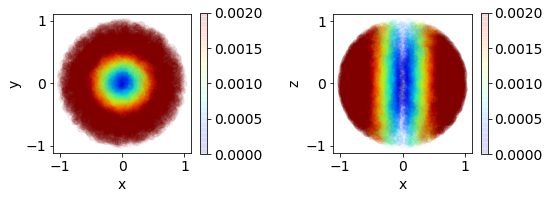

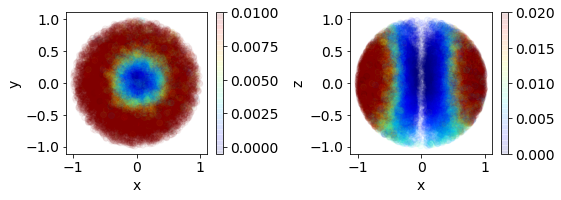

In [117]:
## 2D projected plots
tags=[dists,energy]
colors=['jet','jet']
lims=[[(0,0.002),(0,0.002)],[(-0.0005,0.01),(0,0.02)]]

for j in range(2):
    f,ax=plt.subplots(1,2,figsize=(8,3))
    signs=(xr+yr)
    bisigns=np.ones(signs.shape)
    bisigns[signs<0]=-1
    x_ax=[xr,np.sqrt((xr**2+yr**2))*bisigns]
    proj=[yr,zr]
    axs=['y','z']
    for i in range(2):
        sp=ax[i].scatter(x_ax[i][radius<=xlimdist],proj[i][radius<=xlimdist],c=tags[j][radius<=xlimdist],
                         cmap=colors[j],alpha=0.05)
        ax[i].set_aspect('equal')
        ax[i].set_xlabel('x')
        ax[i].set_ylabel(axs[i])
        cb=fig.colorbar(sp, ax=ax[i])
        cb.set_clim(lims[j][i])
        cb.draw_all()
    plt.tight_layout()
    plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


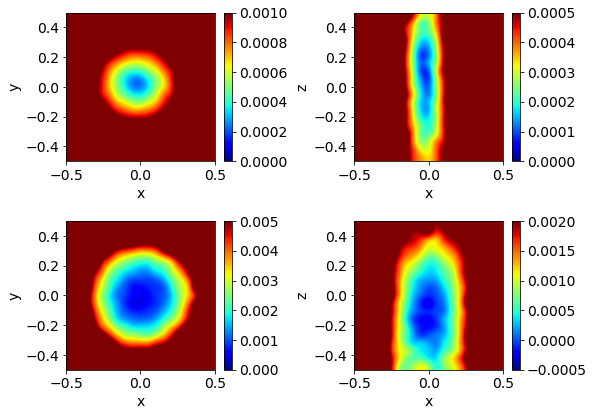

In [119]:
## averaged 2D projected plots
(xlimen,xlimdist)=(0.5,0.5)

step=0.055 #A
xmesh=np.linspace(-xlimen,xlimen,(2*xlimen)/step+1)
mesh=np.meshgrid(xmesh,xmesh)

## calc in-plane distance

signs=(xr+yr)
bisigns=np.ones(signs.shape)
bisigns[signs<0]=-1

## set up axis for loop
x_ax=[xr,np.sqrt((xr**2+yr**2))*bisigns]
proj=[yr,zr]
axs=['y','z']
dists_avg_xy=np.zeros(mesh[0].shape)
dists_avg_xz=np.zeros(mesh[0].shape)
en_avg_xy=np.zeros(mesh[0].shape)
en_avg_xz=np.zeros(mesh[0].shape)

tags_dist=[dists_avg_xy,dists_avg_xz]
tags_en=[en_avg_xy,en_avg_xz]
tags=[tags_dist,tags_en]

values=[dists,energy]
## average in a certain ragion
for h in range(2):
    for k in range(2):
        for i in range(mesh[0].shape[0]):
            for j in range(mesh[0].shape[1]):
                xradius=mesh[0][j,i]
                yradius=mesh[1][j,i]
                tags[h][k][j,i]=np.median(values[h][(x_ax[k]>=xradius)*(x_ax[k]<xradius+step)*
                                                    (proj[k]>=yradius)*(proj[k]<yradius+step)])


## set up plots

colors=['jet','jet']
lims=[[(0,0.001),(0,0.0005)],[(0,0.005),(-0.0005,0.002)]]

f,ax=plt.subplots(2,2,figsize=(8.2,6))
for j in range(2):   
    signs=(xr+yr)
    bisigns=np.ones(signs.shape)
    bisigns[signs<0]=-1
    x_ax=[xr,np.sqrt((xr**2+yr**2))*bisigns]
    proj=[yr,zr]
    axs=['y','z']
    for i in range(2):
        sp=ax[j,i].imshow(tags[j][i],extent=[-xlimen,xlimen,-xlimen,xlimen],cmap=colors[j],interpolation='bicubic')
        ax[j][i].set_aspect('equal')
        ax[j][i].set_xlabel('x')
        ax[j][i].set_ylabel(axs[i])
        cb=fig.colorbar(sp, ax=ax[j][i])
        cb.set_clim(lims[j][i])
        cb.draw_all() 
plt.tight_layout(w_pad=2)
plt.savefig(path+'2dpotentials.svg')
plt.show()